# NDVI (Normalized Difference Vegetation Index)

Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

It compares how much more near-infrared light is reflected by the vegetation vs visible red light:


![NDVI](https://user-images.githubusercontent.com/62169942/170890178-9de7ef3e-cb6a-46d7-bf8d-9d1e1591b191.png)

Normalized Difference Vegetation Index (NDVI), developed by a NASA scientist named Compton Tucker in 1977, is commonly used to assess whether an area contains live green vegetation or not. It can show the difference between water and plants, bare soil and grass, whether plants are under stress, and what lifecycle stage a crop is in.

The NDVI formula combines the information available in the red and NIR bands into a single and representative value.

It does this by subtracting the reflectance in the red spectral band from that in the NIR. Then, it divides this by the sum of the NIR and red reflectance.

The value of the NDVI will always fall between -1 and +1.

Values between -1 and 0 indicate dead plants, or inorganic objects such as stones, roads, and houses.

In this project loaction is part of area Goygol Azerbaijan and use Sentinel images.

# View satellite images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import rioxarray as rxr
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib import colors


In [2]:
def view_image(img,name,title):
    with rasterio.open(img) as src:
        transform = src.meta['transform']
        name = src.read(1)
        
    plt.imshow(name, interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

In [3]:
# For this project use Sentinel images

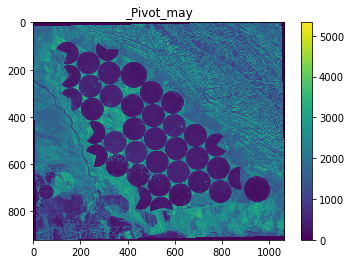

In [4]:
May = view_image("Data/S2B_tile_20210513_38TPL_B04-B03-B02-B08.tif",'May','_Pivot_may')

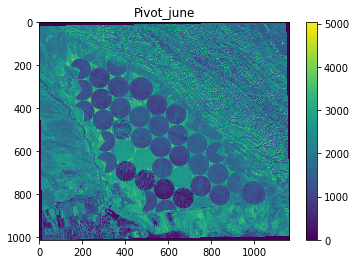

In [5]:
June = view_image("Data/S2A_tile_20210607_38TPL_B04-B03-B02-B08.tif",'June','Pivot_june')

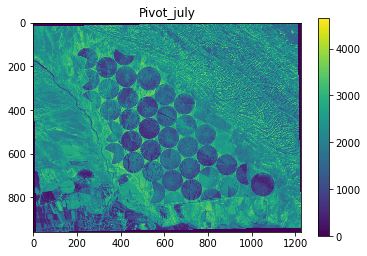

In [6]:
July = view_image('Data/S2A_tile_20210727_38TPL_B04-B03-B02-B08.tif','July','Pivot_july')

In [7]:
# Define each images by month

In [8]:
with rasterio.open("Data/S2B_tile_20210513_38TPL_B04-B03-B02-B08.tif") as src:
    transform = src.meta['transform']
    May = src.read(3)
    
with rasterio.open("Data/S2A_tile_20210607_38TPL_B04-B03-B02-B08.tif") as src:
    transform = src.meta['transform']
    June = src.read(3)
    
with rasterio.open("Data/S2A_tile_20210727_38TPL_B04-B03-B02-B08.tif") as src:
    transform = src.meta['transform']
    July = src.read(3)

Text(0.5, 1.0, 'July_Pivot')

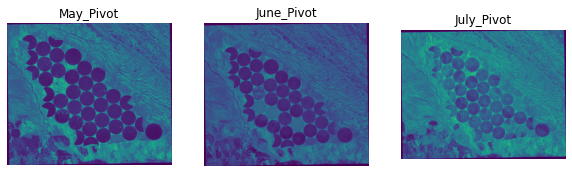

In [9]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(May)
plt.axis('off')
plt.title("May_Pivot")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(June)
plt.axis('off')
plt.title("June_Pivot")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(July)
plt.axis('off')
plt.title("July_Pivot")

# Calculate NDVI

In [10]:
# file source
filename = 'Data/S2B_tile_20210513_38TPL_B04-B03-B02-B08.tif'
filename

'Data/S2B_tile_20210513_38TPL_B04-B03-B02-B08.tif'

In [11]:
# Define red and nir bands

with rasterio.open(filename) as src:
    band_red_may = src.read(3)
with rasterio.open(filename) as src:
    band_nir_may = src.read(4)

In [12]:
# Calculate NDVI 
ndvi_may = (band_nir_may.astype(float) - band_red_may.astype(float)) / (band_nir_may + band_red_may)

<ipython-input-12-69cac120bc30>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi_may = (band_nir_may.astype(float) - band_red_may.astype(float)) / (band_nir_may + band_red_may)


In [13]:
ndvi_may

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [14]:
print(np.nanmin(ndvi_may)) 
print(np.nanmax(ndvi_may))

-0.3389933292904791
0.9995184204189742


In [15]:
meta_may = src.meta
print(meta_may)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1064, 'height': 921, 'count': 4, 'crs': CRS.from_epsg(32638), 'transform': Affine(10.0, 0.0, 613320.0,
       0.0, -10.0, 4541890.0)}


In [16]:
ndvi_may.dtype

dtype('float64')

In [17]:
class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [18]:
min=np.nanmin(ndvi_may)
max=np.nanmax(ndvi_may)

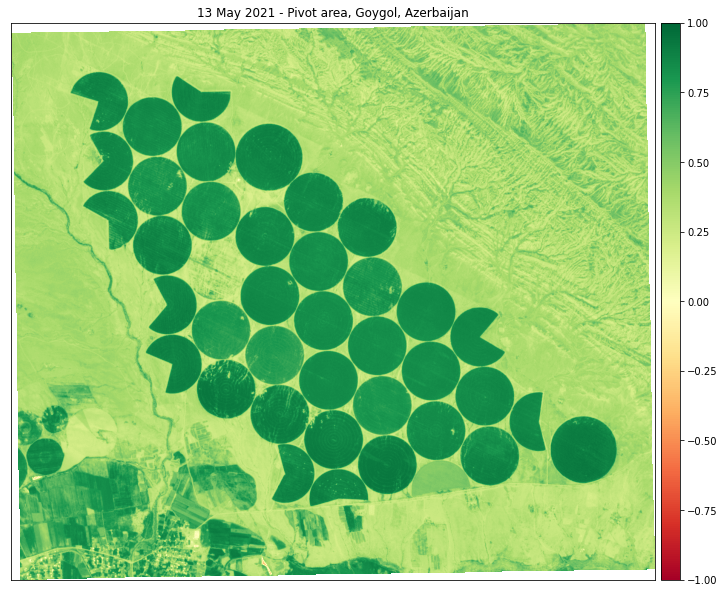

In [19]:
ep.plot_bands(ndvi_may,
              cmap='RdYlGn',
              scale=False,
              vmin=-1, vmax=1,
              title="13 May 2021 - Pivot area, Goygol, Azerbaijan")
plt.show()

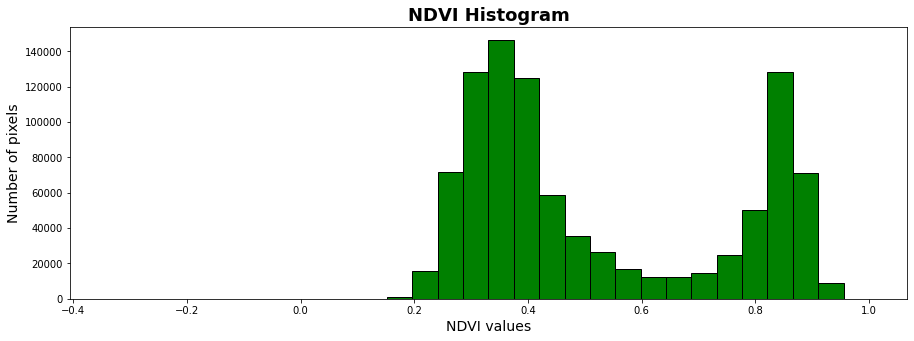

In [20]:
# Define a new figure
fig2 = plt.figure(figsize=(15,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi_may[~np.isnan(ndvi_may)]
color = 'g'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

# Save the generated figure to an external image file
fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()

# June

In [21]:
June_image = rasterio.open('Data/S2A_tile_20210607_38TPL_B04-B03-B02-B08.tif')
June_image

<open DatasetReader name='Data/S2A_tile_20210607_38TPL_B04-B03-B02-B08.tif' mode='r'>

In [22]:
June_image = 'Data/S2A_tile_20210607_38TPL_B04-B03-B02-B08.tif'
with rasterio.open(June_image) as src:
    band_red_Jun = src.read(3)
with rasterio.open(June_image) as src:
    band_nir_Jun = src.read(4)

In [23]:
# NDVI 
ndvi_june = (band_nir_Jun.astype(float) - band_red_Jun.astype(float)) / (band_nir_Jun + band_red_Jun)

<ipython-input-23-799eeeaf5d70>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi_june = (band_nir_Jun.astype(float) - band_red_Jun.astype(float)) / (band_nir_Jun + band_red_Jun)


In [24]:
ndvi_june

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [25]:
print(np.nanmin(ndvi_june)) 
print(np.nanmax(ndvi_june))

-0.5344563552833078
0.999464237878382


In [26]:
meta1 = src.meta
print(meta1)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1164, 'height': 1012, 'count': 4, 'crs': CRS.from_epsg(32638), 'transform': Affine(10.0, 0.0, 612850.0,
       0.0, -10.0, 4542760.0)}


In [27]:
ndvi_june.dtype

dtype('float64')

In [28]:
min=np.nanmin(ndvi_june)
max=np.nanmax(ndvi_june)

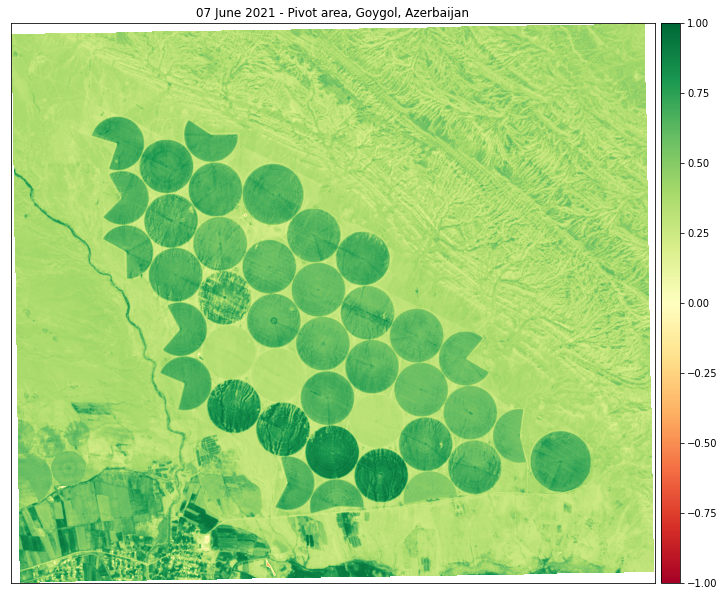

In [29]:
ep.plot_bands(ndvi_june,
              cmap='RdYlGn',
              scale=False,
              vmin=-1, vmax=1,
              title="07 June 2021 - Pivot area, Goygol, Azerbaijan")
plt.show()

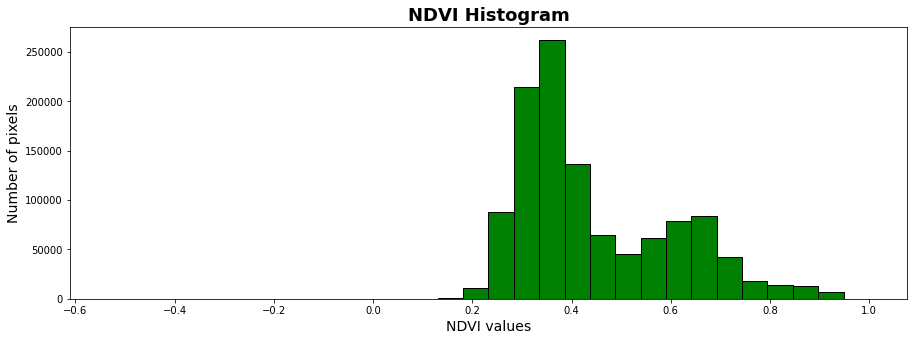

In [30]:
# Define a new figure
fig2 = plt.figure(figsize=(15,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi_june[~np.isnan(ndvi_june)]
color = 'g'
# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

# Save the generated figure to an external image file
#fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)


plt.show()

# July

In [31]:
jul_image = 'Data/S2A_tile_20210727_38TPL_B04-B03-B02-B08.tif'
with rasterio.open(jul_image) as src:
    band_red_jul = src.read(3)
with rasterio.open(jul_image) as src:
    band_nir_jul = src.read(4)

In [32]:
# NDVI 
ndvi_jul = (band_nir_jul.astype(float) - band_red_jul.astype(float)) / (band_nir_jul + band_red_jul)

<ipython-input-32-12d249d00875>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi_jul = (band_nir_jul.astype(float) - band_red_jul.astype(float)) / (band_nir_jul + band_red_jul)


In [33]:
ndvi_jul

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [34]:
print(np.nanmin(ndvi_jul)) 
print(np.nanmax(ndvi_jul))

-0.1660290742157613
0.9294938917975567


In [35]:
meta_jul = src.meta
print(meta_jul)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1226, 'height': 958, 'count': 4, 'crs': CRS.from_epsg(32638), 'transform': Affine(10.0, 0.0, 612280.0,
       0.0, -10.0, 4542240.0)}


In [36]:
ndvi_jul.dtype


dtype('float64')

In [37]:
min=np.nanmin(ndvi_jul)
max=np.nanmax(ndvi_jul)

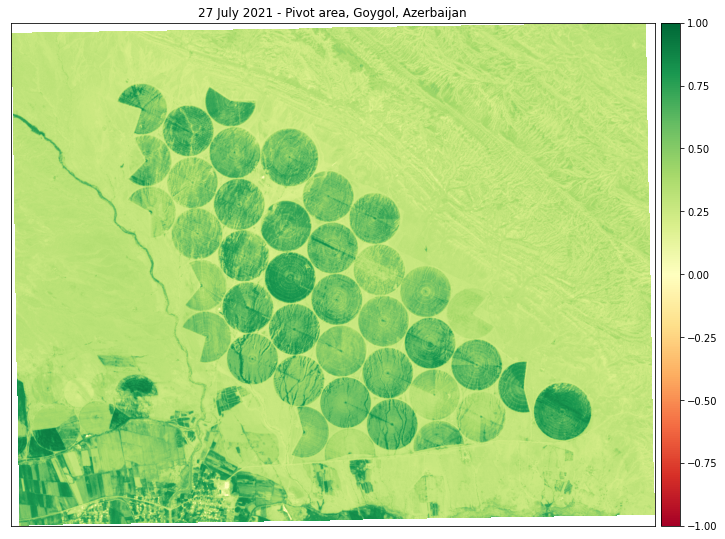

In [38]:
ep.plot_bands(ndvi_jul,
              cmap='RdYlGn',
              scale=False,
              vmin=-1, vmax=1,
              title="27 July 2021 - Pivot area, Goygol, Azerbaijan")
plt.show()

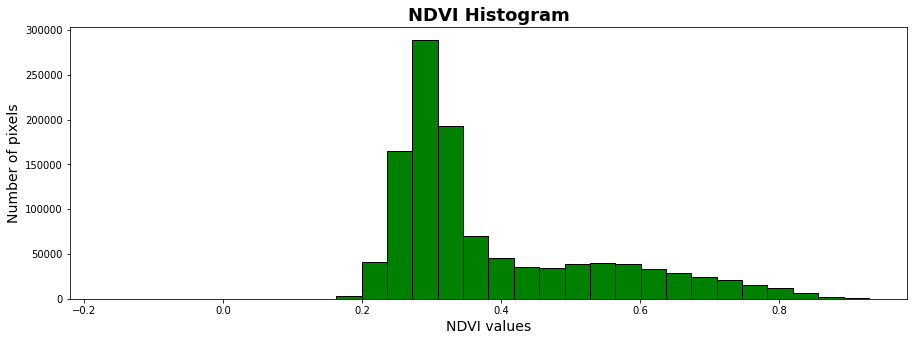

In [39]:
# Define a new figure
fig2 = plt.figure(figsize=(15,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi_jul[~np.isnan(ndvi_jul)]

# color = 'g'
# # call 'hist` with our x-axis, bins, and color details
# ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

color = 'g'
# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

# Save the generated figure to an external image file
#fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)


plt.show()

Text(0.5, 1.0, 'July_NDVI')

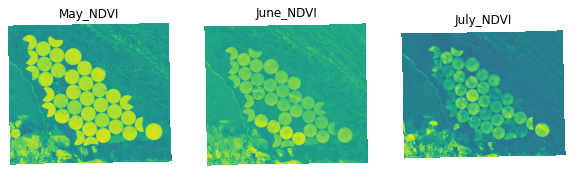

In [40]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(ndvi_may)
plt.axis('off')
plt.title("May_NDVI")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(ndvi_june)
plt.axis('off')
plt.title("June_NDVI")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(ndvi_jul)
plt.axis('off')
plt.title("July_NDVI")

Normalized Difference Vegetation Index (NDVI) inform us level of healthy and disease of irrigation pivot in the field. From table and images we see that May most crop area (vegetation) is greener and healthier. According end of summer vegetation is going to turn yellow, which is due to the harvest. The process of preparing the area for new plants is underway.